Test Merlin

In [1]:
!pip install pyLemma==0.0.12
!pip install numpy 
!pip install matplotlib
!pip install cmocean

In [2]:
import pyLemma.Merlin as mrln 
import pyLemma.FDEM1D as em1d 
import pyLemma.LemmaCore as lc 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
lmod = em1d.LayeredEarthEM() 
lmod.SetNumberOfLayers(3)
lmod.SetLayerThickness([10])
lmod.SetLayerConductivity([0,1/20,1/100])
lmod.SetMagneticFieldIncDecMag( 67, 9, 52750, lc.NANOTESLA )
#print(lmod)

tx = em1d.PolygonalWireAntenna()
tx.SetNumberOfPoints(5)
tx.SetPoint(0,( 50,  50, -1e-3))
tx.SetPoint(1,(150,  50, -1e-3))
tx.SetPoint(2,(150, 150, -1e-3))
tx.SetPoint(3,( 50, 150, -1e-3))
tx.SetPoint(4,( 50,  50, -1e-3))
tx.SetNumberOfFrequencies(1)
tx.SetFrequency(0,2246) 
tx.SetCurrent(1.)

rx = em1d.PolygonalWireAntenna()
rx.SetNumberOfPoints(5)
rx.SetPoint(0,( 75,  75, -1e-3))
rx.SetPoint(1,(125,  75, -1e-3))
rx.SetPoint(2,(125, 125, -1e-3))
rx.SetPoint(3,( 75, 125, -1e-3))
rx.SetPoint(4,( 75,  75, -1e-3))
rx.SetNumberOfFrequencies(1)
rx.SetFrequency(0,2246) 
rx.SetCurrent(1.)

Kern = mrln.KernelV0()
Kern.PushCoil( "Coil 1", tx )
Kern.PushCoil( "Coil 2", rx )
Kern.SetLayeredEarthEM( lmod );
Kern.SetIntegrationSize( (200,200,200) )
Kern.SetIntegrationOrigin( (0,0,0) )
Kern.SetTolerance( 1e-9 )
#Kern.SetMinLevel( 3 )
Kern.SetHankelTransformType( lc.FHTKEY201 )

thick = np.geomspace(1,15,num=45)
iface = np.cumsum(thick)
Kern.SetDepthLayerInterfaces(iface)
#Kern.SetDepthLayerInterfaces(np.geomspace(1, 110, num=40))
#Kern.SetDepthLayerInterfaces(np.linspace(1, 110, num=50))
#Kern.SetDepthLayerInterfaces(np.geomspace(1, 110, num=40))
 
# auto AkvoDataNode = YAML::LoadFile(argv[4]);
# Kern->AlignWithAkvoDataset( AkvoDataNode );

Kern.SetPulseDuration(0.040)
Kern.SetPulseCurrent(np.geomspace(500,1,40))

Kern.CalculateK0( ["Coil 1"], ["Coil 1"], False )

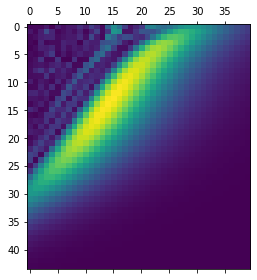

In [4]:
yml = open('test-' + str(Kern.GetTolerance()) + '.yaml', 'w')
print(Kern, file=yml)

K0 = Kern.GetKernel()
plt.matshow(np.abs(K0))
plt.show()